 Prepare the general libraries.

In [1]:
# libraries
library(community)
library(ggplot2)

 Prepare the path.

In [2]:
# the path to the counts, cell annotation and sample annation file. In this case its our working dir same as
# the notebook
path_in <- "../../run_community/outs/"

print("path_in")
print(path_in)

[1] "path_in"
[1] "../../run_community/outs/"


Load data.

In [3]:
suppressWarnings(load(paste0(path_in,"community_interactions.RData")))

Load functions for visualization.

In [4]:
data("visualization_functions")

## Parameters

In [5]:
interactions <- community_interactions

In [6]:
# threshold for log2FC of the weights
threshold_log2FC <- interactions$thresholds$threshold_log2FC

idx_up <- interactions$anno_interactions$log2FC_weights > threshold_log2FC
idx_unchanged <- abs(interactions$anno_interactions$log2FC_weights)<= threshold_log2FC
idx_down <- interactions$anno_interactions$log2FC_weights < -threshold_log2FC
idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign
idx_good <- interactions$anno_interactions$passed_QC_filter

In [7]:
# extract cell types
cell_types <- unique(interactions$anno_cells$cell_type)
print(cell_types)

[1] "Mono" "Gran" "T"    "NK"   "B"    "HSPC" "Ery"  "DC"  


In [8]:
# define broad type of interactions by cell types
immune_cell_types <- cell_types[!(cell_types %in% c("Ery","HSPC"))]

interaction_cell_types <- unique(paste(interactions$anno_interactions$sending_cell_type
                                ,interactions$anno_interactions$receiving_cell_type
                                ,sep = " to "))

interaction_type <- sapply(interaction_cell_types
                           ,function(i){
                               ifelse(grepl("Ery",i)
                                      ,"engages Ery"
                                      ,ifelse(grepl("HSPC",i)
                                              ,"engages HSPC"
                                              ,"among immune cells"))
                           })
print(str(interaction_type))

interaction_type_by_ID <- sapply(interactions$anno_interactions$interaction_ID
                           ,function(i){
                               ifelse(grepl("Ery",i)
                                      ,"engages Ery"
                                      ,ifelse(grepl("HSPC",i)
                                              ,"engages HSPC"
                                              ,"among immune cells"))
                           })
print(str(interaction_type_by_ID))

colors_interaction_type <- c("engages HSPC" = "magenta"
                             ,"among immune cells" = "deepskyblue"
                             ,"engages Ery" = "lightgoldenrod"
                            )
print(colors_interaction_type)

 Named chr [1:64] "among immune cells" "among immune cells" ...
 - attr(*, "names")= chr [1:64] "Mono to Mono" "Mono to Gran" "Mono to T" "Mono to NK" ...
NULL
 Named chr [1:151744] "among immune cells" "among immune cells" ...
 - attr(*, "names")= chr [1:151744] "Mono:JAG2_Mono:NOTCH1" "Mono:DLL1_Mono:NOTCH1" "Mono:IGF1_Mono:IGF1R" "Mono:JAG1_Mono:NOTCH1" ...
NULL
      engages HSPC among immune cells        engages Ery 
         "magenta"      "deepskyblue"   "lightgoldenrod" 


## Visualization: all good quality interactions

### Mean weight vs mean number 

In [9]:
library(ggrepel) # to add text labels on the mean weigth vs number of interactions plot

In [10]:
# claclulate mean weight of good interactions for each cell type to cell type communication (i.e. "T to B", "DC to T")
mean_weights_goodInteractions <- mean_weights(interactions)

print(str(mean_weights_goodInteractions))

List of 2
 $ AML    :'data.frame':	8 obs. of  8 variables:
  ..$ Mono: num [1:8] 0.05425 0.04701 0.01558 0.0113 0.00782 ...
  ..$ Gran: num [1:8] 0.0486 0.058 0.0165 0.0101 0.0201 ...
  ..$ T   : num [1:8] 0.0144 0.0184 0.1206 0.0844 0.0289 ...
  ..$ NK  : num [1:8] 0.0106 0.0111 0.0814 0.0668 0.0171 ...
  ..$ B   : num [1:8] 0.00721 0.01897 0.0299 0.01674 0.02255 ...
  ..$ HSPC: num [1:8] 0.0127 0.0278 0.0318 0.0195 0.0276 ...
  ..$ Ery : num [1:8] 0.00122 0.00646 0.00849 0.003 0.00873 ...
  ..$ DC  : num [1:8] 0.01538 0.02064 0.03365 0.02455 0.00754 ...
 $ healthy:'data.frame':	8 obs. of  8 variables:
  ..$ Mono: num [1:8] 0.0401 0.0545 0.0325 0.0261 0.0315 ...
  ..$ Gran: num [1:8] 0.0545 0.0837 0.044 0.0306 0.0478 ...
  ..$ T   : num [1:8] 0.0372 0.0495 0.0559 0.0308 0.0455 ...
  ..$ NK  : num [1:8] 0.0286 0.0337 0.0318 0.0228 0.0244 ...
  ..$ B   : num [1:8] 0.0358 0.0533 0.0433 0.0236 0.0697 ...
  ..$ HSPC: num [1:8] 0.0081 0.01163 0.00649 0.00491 0.00693 ...
  ..$ Ery : num [1:8

In [11]:
# claclulate number of good interactions for each cell type to cell type communication (i.e. "T to B", "DC to T")
number_goodInteractions <- number_interactions(interactions)

print(str(number_goodInteractions))

List of 2
 $ AML    :'data.frame':	8 obs. of  8 variables:
  ..$ Mono: int [1:8] 277 260 135 145 150 230 114 243
  ..$ Gran: int [1:8] 259 259 132 147 142 222 162 246
  ..$ T   : int [1:8] 147 137 90 99 97 139 94 133
  ..$ NK  : int [1:8] 117 114 69 77 69 110 54 114
  ..$ B   : int [1:8] 114 113 62 62 73 107 58 105
  ..$ HSPC: int [1:8] 196 198 113 119 114 186 128 197
  ..$ Ery : int [1:8] 119 158 85 65 92 157 120 101
  ..$ DC  : int [1:8] 205 210 105 121 119 184 86 206
 $ healthy:'data.frame':	8 obs. of  8 variables:
  ..$ Mono: int [1:8] 276 260 135 145 150 237 121 246
  ..$ Gran: int [1:8] 261 262 134 149 143 237 178 256
  ..$ T   : int [1:8] 146 137 90 99 97 140 96 135
  ..$ NK  : int [1:8] 118 115 69 77 69 111 54 117
  ..$ B   : int [1:8] 113 113 61 61 72 106 65 107
  ..$ HSPC: int [1:8] 207 208 117 123 117 188 128 205
  ..$ Ery : int [1:8] 124 171 88 70 97 157 120 140
  ..$ DC  : int [1:8] 221 229 113 129 126 211 121 223
NULL


In [12]:
immune_cell_types <- cell_types[!(cell_types %in% c("Ery","HSPC"))]
grepl(paste(immune_cell_types, collapse="|"), "B cell")

[1] TRUE

'data.frame':	64 obs. of  4 variables:
 $ mean_interaction_weight: num  0.05425 0.04701 0.01558 0.0113 0.00782 ...
 $ number_of_interactions : int  277 260 135 145 150 230 114 243 259 259 ...
 $ interaction_ID         : chr  "Mono to Mono" "Gran to Mono" "T to Mono" "NK to Mono" ...
 $ interaction_type       : chr  "among immune cells" "among immune cells" "among immune cells" "among immune cells" ...
NULL
'data.frame':	64 obs. of  4 variables:
 $ mean_interaction_weight: num  0.0401 0.0545 0.0325 0.0261 0.0315 ...
 $ number_of_interactions : int  276 260 135 145 150 237 121 246 261 262 ...
 $ interaction_ID         : chr  "Mono to Mono" "Gran to Mono" "T to Mono" "NK to Mono" ...
 $ interaction_type       : chr  "among immune cells" "among immune cells" "among immune cells" "among immune cells" ...
NULL


Warning message:
“ggrepel: 56 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 60 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[[1]]

[[2]]


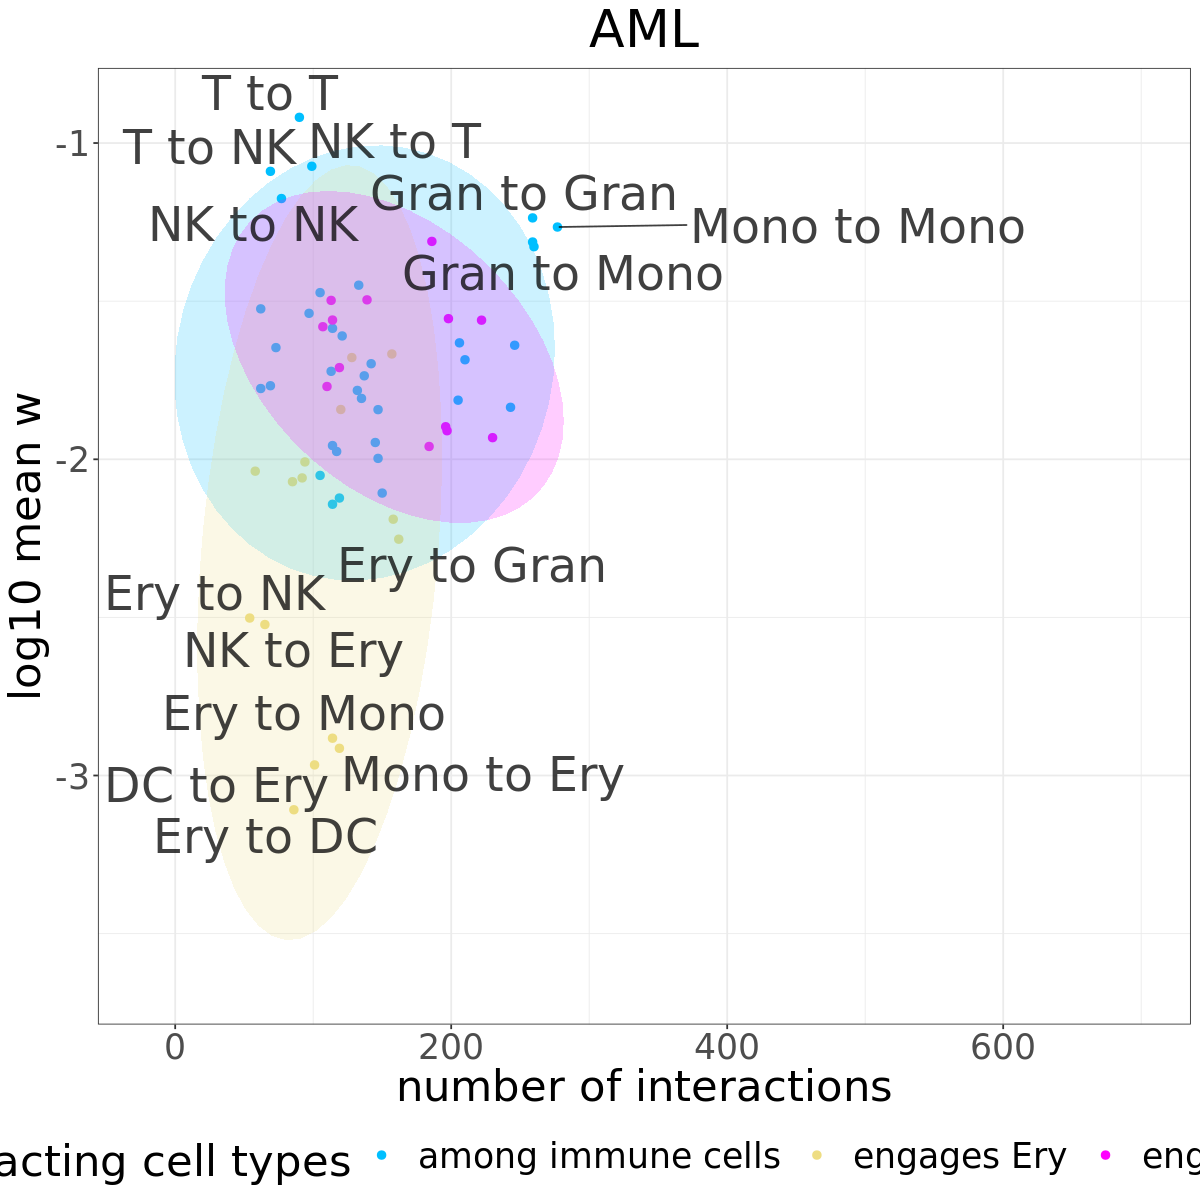

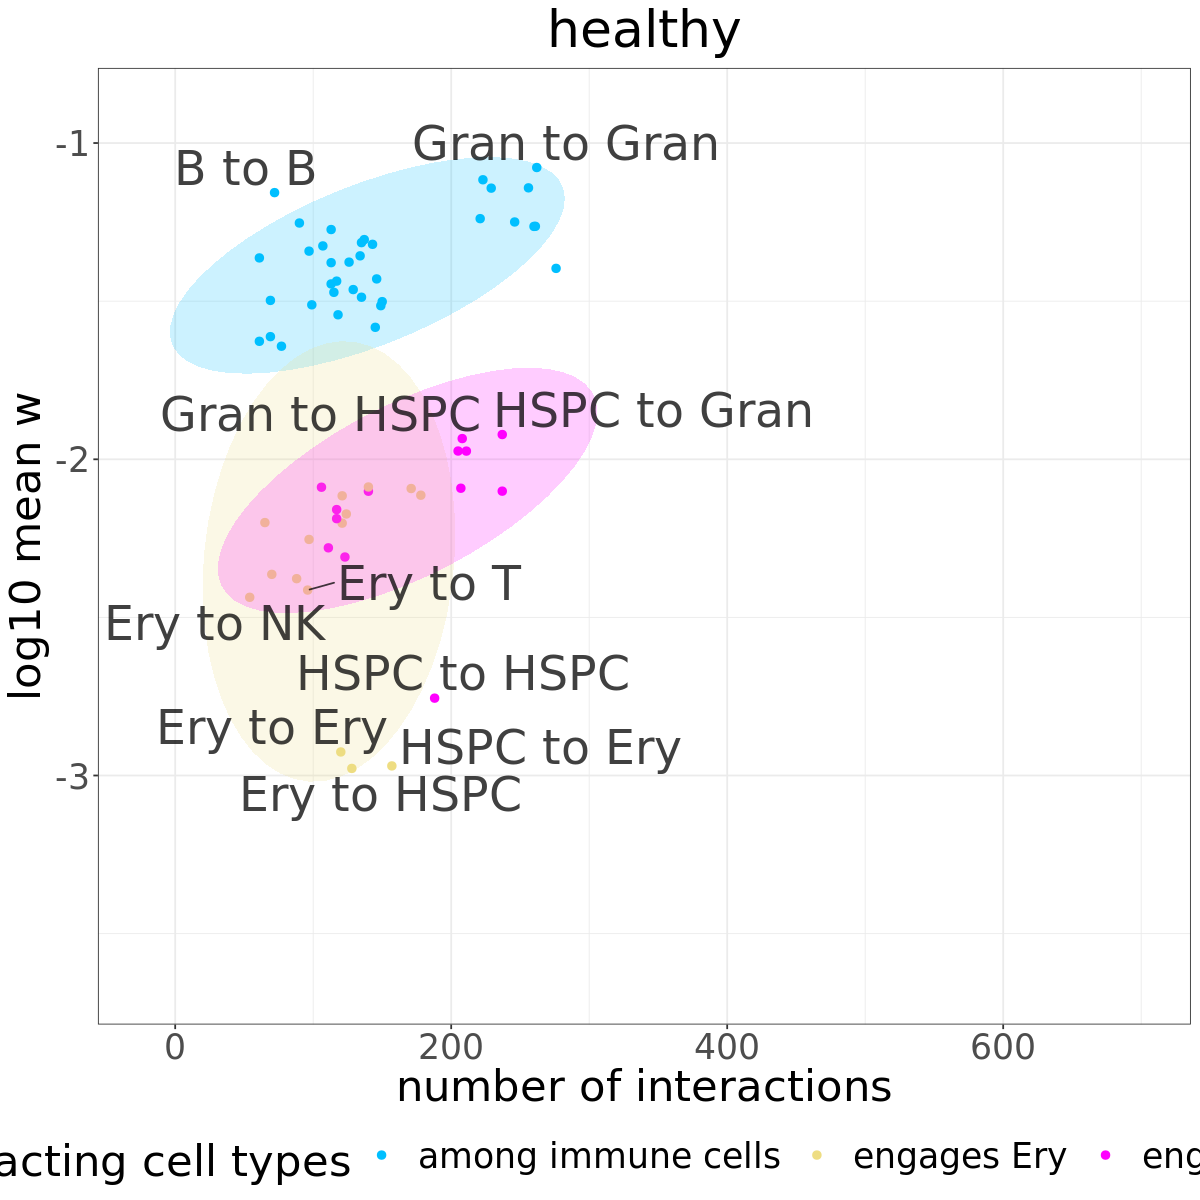

In [13]:
# plot mumber of interactions vs mean interaction weights per cell type to cell type interaction
options(repr.plot.width = 10
        ,repr.plot.height = 10)

ylim <- c(-3.65, -0.9)
xlim <- c(-20, 700)

plot_nrInt_vs_meanW_perCellType(interactions
                               ,interaction_type = interaction_type
                               ,colors = colors_interaction_type
                               ,ylim = ylim
                               ,label_font_size = 10)

### Ligand-receptor families

## Visualization of differential interactions

### Voclano

In [14]:
print("downregulated:")
print(sum(idx_down & idx_sign))

print("upregulated:")
print(sum(idx_up & idx_sign))

[1] "downregulated:"
[1] 726
[1] "upregulated:"
[1] 9


In [15]:
# REMOVE THIS AFTER RECOMPILING THE PACKAGE!!!

# recalculate log2FC of w
interactions$anno_interactions$log2FC_weights <- log2FC(x = interactions$weights,anno_samples = interactions$anno_samples)

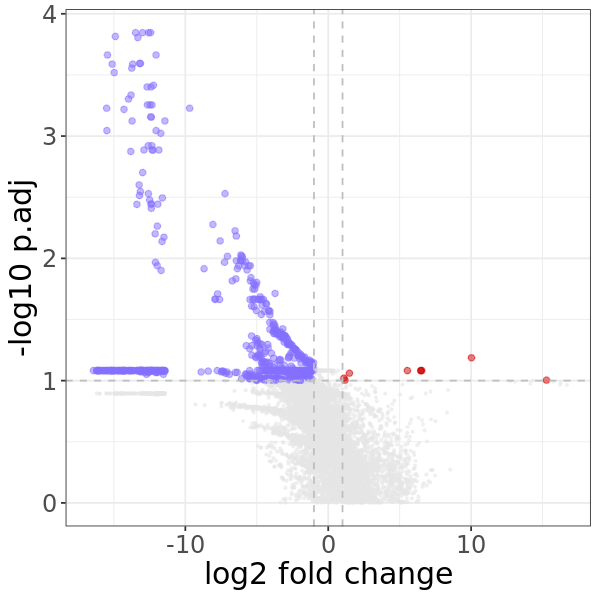

In [16]:
# volcano plot
options(repr.plot.height = 5
       ,repr.plot.width = 5)
    
plot_vulcano(interactions)

### Heatmap top differential

In [17]:
library(ComplexHeatmap) # to plot heatmaps
library(circlize) # for gragient colors

Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Warning message:
“package ‘circlize’ was built under R version 4.1.3”
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements

In [18]:
# heatmap of interactions weight of top differential interactions
# top adjusted p value
idx_topsign <- interactions$anno_interactions$p.adj %in% unique(sort(interactions$anno_interactions$p.adj))[1:300]
idx_topdown <- interactions$anno_interactions$log2FC_weights < -1 & idx_topsign
idx_topdown20 <- interactions$anno_interactions$interaction_ID %in% interactions$anno_interactions$interaction_ID[idx_topdown][1:8]

# all upregulated interactions
idx_topsign <- interactions$anno_interactions$p.adj %in% unique(sort(interactions$anno_interactions$p.adj))[1:500]
idx_topup <- interactions$anno_interactions$log2FC_weights > 1 & idx_topsign
idx_topup5 <- interactions$anno_interactions$interaction_ID %in% interactions$anno_interactions$interaction_ID[idx_topup][1:7]

# top 20 downregulated interactions

idx <- idx_topup5 | idx_topdown20
print(sum(idx))

[1] 15


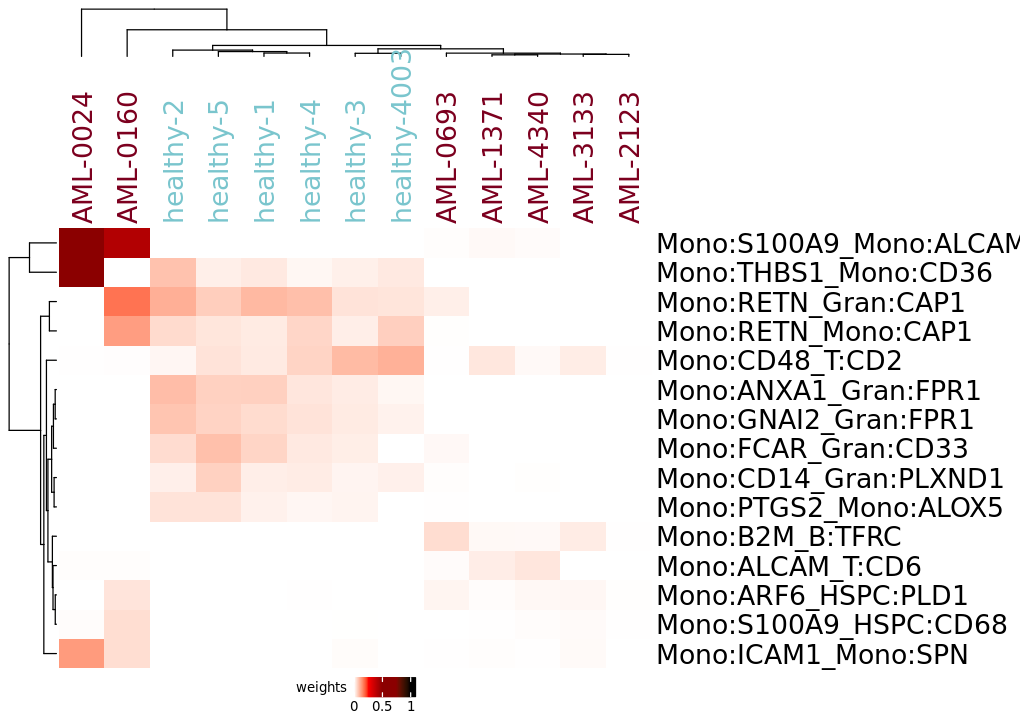

In [19]:
set.seed(3)
options(repr.plot.height = 6
       ,repr.plot.width = 8.5
       )
plot_heatmap(interactions
            ,which_interactions = idx
            ,values_to_plot = "weights"
            ,row_font_size = 16
            ,column_font_size = 16
            )

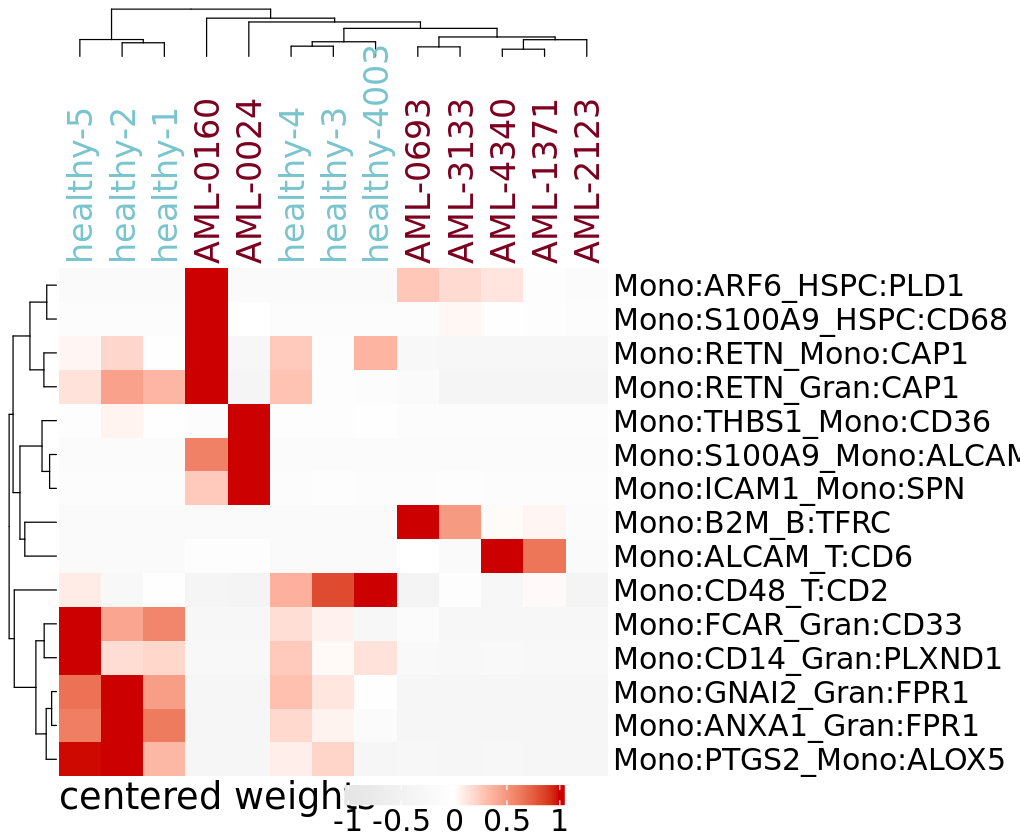

In [20]:
# centred Heatmap
set.seed(3)
options(repr.plot.height = 7
       ,repr.plot.width = 8.5
       )
plot_heatmap(interactions
            ,which_interactions = idx
            ,values_to_plot = "weights"
            ,row_font_size =18
            ,column_font_size = 20
             ,centered = TRUE
             ,color_values = circlize::colorRamp2(c(-1,0,1), c("gray90","white", "red3"))
             ,legend_title_font_size = 22
             ,labels_font_size = 18
            )

### Barplot with cell type of differential interactions

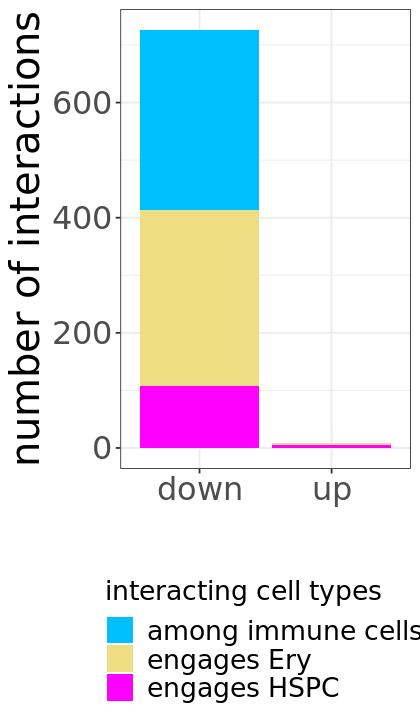

In [21]:
# stacked bar interaction classes: up- and downregulated
options(repr.plot.width = 3.5
       ,repr.plot.height = 6)

plot_stacked_bar(interactions
                ,idx_up = idx_up
                ,idx_down = idx_down
                ,idx_sign = idx_sign
                ,interaction_type = interaction_type_by_ID
                ,colors = colors_interaction_type
                ,font_size = 24
                )+
theme(legend.text = element_text(size=16)
      ,legend.title = element_text(size=16)
     ,legend.position = "bottom"
     ,legend.direction = "vertical")

### Network plots

In [22]:
library(igraph) # to plot circus plots


Attaching package: ‘igraph’


The following object is masked from ‘package:circlize’:

    degree


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




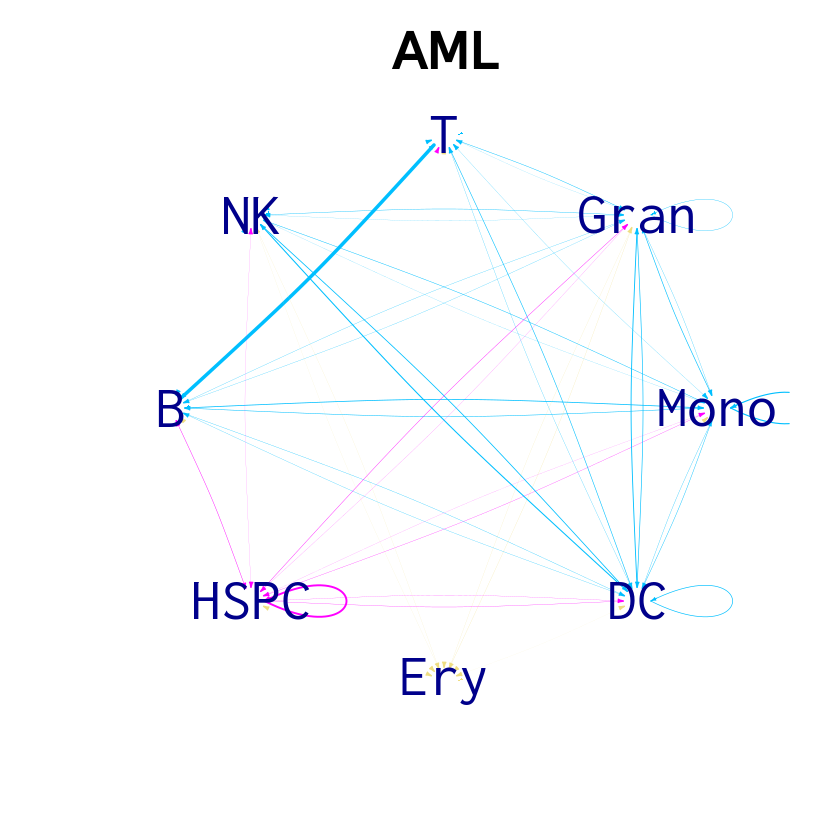

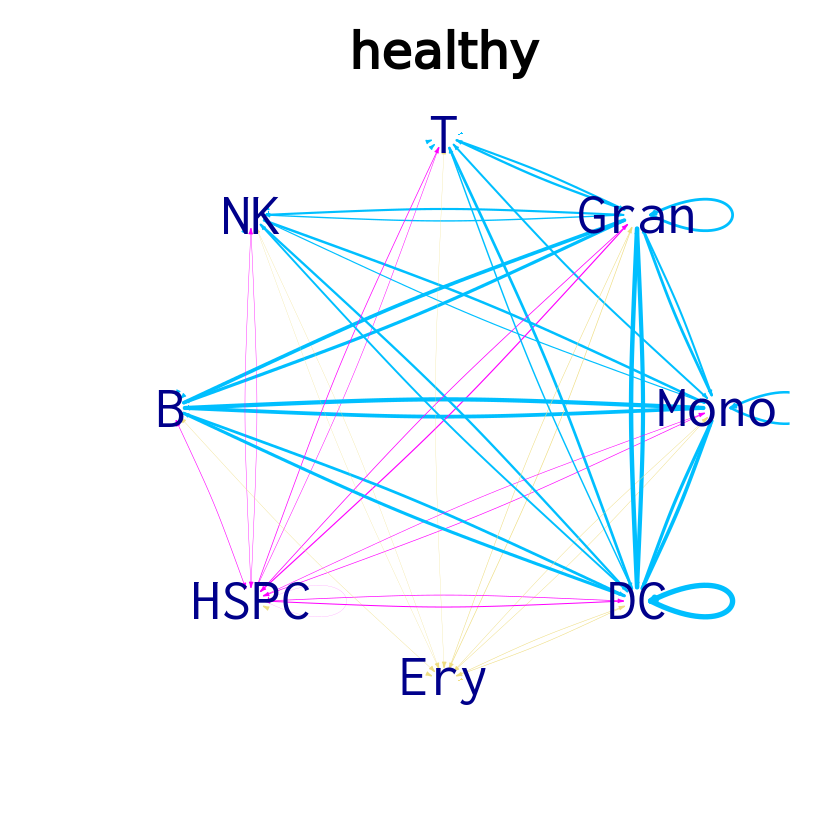

In [23]:
options(repr.plot.width = 7
       ,repr.plot.height = 7)

colors <- colors_interaction_type[interaction_type]
names(colors) <- names(interaction_type)

plor_celltype_network(interactions
                     ,edge.color = colors
                     ,title_cex = 2.5
                     ,vertex.label.cex = 3
                     ,edge.arrow.size = 0.2
                     ,verbose = FALSE
                     )

### Ligand-receptor families

## Visualization of individual components

<img src="components_scheme.png">

### Forest plots

In [24]:
library(gridExtra) 

Warning message:
“package ‘gridExtra’ was built under R version 4.1.3”


In [25]:
# indices

idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign
idx_good <- interactions$anno_interactions$passed_QC_filter

idx_up <- interactions$anno_interactions$log2FC_weights >1
idx_unchanged <- abs(interactions$anno_interactions$log2FC_weights)<=1
idx_down <- interactions$anno_interactions$log2FC_weights < -1

idx_only_rho_s <- interactions$anno_interactions$components_affected_s == "rho" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_rho_r <- interactions$anno_interactions$components_affected_r == "rho" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_phi_s <- interactions$anno_interactions$components_affected_s == "phi" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_phi_r <- interactions$anno_interactions$components_affected_r == "phi" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_p_s <- interactions$anno_interactions$components_affected_s == "p" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_p_r <- interactions$anno_interactions$components_affected_r == "p" & interactions$anno_interactions$nr_comp_affected_b == 1 

idx_nrComp_s_none <- interactions$anno_interactions$nr_comp_affected_s == 0
idx_nrComp_s_one <- interactions$anno_interactions$nr_comp_affected_s == 1
idx_nrComp_s_several <- interactions$anno_interactions$nr_comp_affected_s >1

idx_nrComp_r_none <- interactions$anno_interactions$nr_comp_affected_r == 0
idx_nrComp_r_one <- interactions$anno_interactions$nr_comp_affected_r == 1
idx_nrComp_r_several <- interactions$anno_interactions$nr_comp_affected_r >1

idx_no_change <- interactions$anno_interactions$interaction_category == "no_change"
idx_simple_decrease <- interactions$anno_interactions$interaction_category == "simple_decrease"
idx_simple_increase <- interactions$anno_interactions$interaction_category == "simple_increase"
idx_concordant_decrease <- interactions$anno_interactions$interaction_category == "concordant_decrease"
idx_concordant_increase <- interactions$anno_interactions$interaction_category == "concordant_increase"
idx_insufficient_comp <- interactions$anno_interactions$interaction_category == "insufficient_compensation"
idx_sufficient_comp <- interactions$anno_interactions$interaction_category == "sufficient_compensation"

In [26]:
# ordered IDs

# no change
ID_order_no_change <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                     idx_no_change
                                                                                   ,]
                                                   )$interaction_ID

# simpe down: rho_s -> phi_s -> p_s -> rho_r -> phi_r -> p_r
ID_order_rho_s_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_rho_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_s_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_phi_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_s_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_decrease &
                                                                                   idx_only_p_s 
                                                                                   ,]
                                                   )$interaction_ID

ID_order_rho_r_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_rho_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_r_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_phi_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_r_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_decrease &
                                                                                   idx_only_p_r 
                                                                                   ,]
                                                   )$interaction_ID

# simpe up: rho_s -> phi_s -> p_s -> rho_r -> phi_r -> p_r
ID_order_rho_s_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_rho_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_s_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_phi_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_s_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_increase &
                                                                                   idx_only_p_s 
                                                                                   ,]
                                                   )$interaction_ID

ID_order_rho_r_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_rho_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_r_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_phi_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_r_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_increase &
                                                                                   idx_only_p_r 
                                                                                   ,]
                                                   )$interaction_ID

# concordant down: sender -> receiver -> both
ID_order_concordantDown_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_one_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_one_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_several_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_several_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

# concordant up: sender -> receiver -> both
ID_order_concordantUp_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_one_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_one_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_several_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_several_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

# insufficiend compensation down: sender -> receiver -> both
ID_order_insuffDown_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_down & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffDown_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_down & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffDown_b <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_down & 
                                                                                   idx_insufficient_comp &
                                                                                   (idx_nrComp_s_one | idx_nrComp_s_several) &
                                                                                   (idx_nrComp_r_one | idx_nrComp_r_several)
                                                                                   ,]
                                                   )$interaction_ID

# insufficiend compensation up: sender -> receiver -> both
ID_order_insuffUp_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_up & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffUp_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_up & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffUp_b <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_up & 
                                                                                   idx_insufficient_comp &
                                                                                   (idx_nrComp_s_one | idx_nrComp_s_several) &
                                                                                   (idx_nrComp_r_one | idx_nrComp_r_several)
                                                                                   ,]
                                                   )$interaction_ID

# sufficient compensation: sender -> receiver -> both
ID_order_suffComp_s <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                   idx_sufficient_comp &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_suffComp_r <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                   idx_sufficient_comp &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_suffComp_b <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                   idx_sufficient_comp &
                                                                                   (idx_nrComp_s_one | idx_nrComp_s_several) &
                                                                                   (idx_nrComp_r_one | idx_nrComp_r_several)
                                                                                   ,]
                                                   )$interaction_ID

In [27]:
IDs_all <- as.character(c(ID_order_no_change
                          ,ID_order_rho_s_only_down
                          ,ID_order_phi_s_only_down
                          ,ID_order_p_s_only_down
                          ,ID_order_rho_r_only_down
                          ,ID_order_phi_r_only_down
                          ,ID_order_p_r_only_down
                          ,ID_order_rho_s_only_up
                          ,ID_order_phi_s_only_up
                          ,ID_order_p_s_only_up
                          ,ID_order_rho_r_only_up
                          ,ID_order_phi_r_only_up
                          ,ID_order_p_r_only_up
                          ,ID_order_concordantDown_s
                          ,ID_order_concordantDown_r
                          ,ID_order_concordantDown_b_one_one
                          ,ID_order_concordantDown_b_one_several
                          ,ID_order_concordantDown_b_several_one
                          ,ID_order_concordantDown_b_several_several
                          ,ID_order_concordantUp_s
                          ,ID_order_concordantUp_r
                          ,ID_order_concordantUp_b_one_one
                          ,ID_order_concordantUp_b_one_several
                          ,ID_order_concordantUp_b_several_one
                          ,ID_order_concordantUp_b_several_several
                          ,ID_order_insuffDown_s
                          ,ID_order_insuffDown_r
                          ,ID_order_insuffDown_b
                          ,ID_order_insuffUp_s
                          ,ID_order_insuffUp_r
                          ,ID_order_insuffUp_b
                          ,ID_order_suffComp_s
                          ,ID_order_suffComp_r
                          ,ID_order_suffComp_b
                         )
                       )

# revert
IDs_all <- IDs_all[length(IDs_all):1]

print(str(IDs_all))

 chr [1:2765] "B:TGFB1_Gran:TGFBR2" "B:SRGN_DC:CD44" "B:TGFB1_DC:SMAD3" ...
NULL


#### Split by category

In [28]:
rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
of_interest <- interactions$anno_interactions[IDs_all,]

idx_log2FC_w_min <- of_interest$log2FC_weights == min(of_interest$log2FC_weights)
ID_log2FC_w_min <- of_interest$interaction_ID[idx_log2FC_w_min][1]

idx_log2FC_w_max <- of_interest$log2FC_weights == max(of_interest$log2FC_weights)
ID_log2FC_w_max <- of_interest$interaction_ID[idx_log2FC_w_max][1]


idx_log2FC_rho_s_min <- of_interest$log2FC_rho_s == min(of_interest$log2FC_rho_s)
ID_log2FC_rho_s_min <- of_interest$interaction_ID[idx_log2FC_rho_s_min][1]

idx_log2FC_rho_s_max <- of_interest$log2FC_rho_s == max(of_interest$log2FC_rho_s)
ID_log2FC_rho_s_max <- of_interest$interaction_ID[idx_log2FC_rho_s_max][1]


idx_log2FC_phi_s_min <- of_interest$log2FC_phi_s_l == min(of_interest$log2FC_phi_s_l)
ID_log2FC_phi_s_min <- of_interest$interaction_ID[idx_log2FC_phi_s_min][1]

idx_log2FC_phi_s_max <- of_interest$log2FC_phi_s_l == max(of_interest$log2FC_phi_s_l)
ID_log2FC_phi_s_max <- of_interest$interaction_ID[idx_log2FC_phi_s_max][1]


idx_log2FC_p_s_min <- of_interest$log2FC_p_s_l == min(of_interest$log2FC_p_s_l)
ID_log2FC_p_s_min <- of_interest$interaction_ID[idx_log2FC_p_s_min][1]

idx_log2FC_p_s_max <- of_interest$log2FC_p_s_l == max(of_interest$log2FC_p_s_l)
ID_log2FC_p_s_max <- of_interest$interaction_ID[idx_log2FC_p_s_max][1]


idx_log2FC_rho_r_min <- of_interest$log2FC_rho_r == min(of_interest$log2FC_rho_r)
ID_log2FC_rho_r_min <- of_interest$interaction_ID[idx_log2FC_rho_r_min][1]

idx_log2FC_rho_r_max <- of_interest$log2FC_rho_r == max(of_interest$log2FC_rho_r)
ID_log2FC_rho_r_max <- of_interest$interaction_ID[idx_log2FC_rho_r_max][1]


idx_log2FC_phi_r_min <- of_interest$log2FC_phi_r_r == min(of_interest$log2FC_phi_r_r)
ID_log2FC_phi_r_min <- of_interest$interaction_ID[idx_log2FC_phi_r_min][1]

idx_log2FC_phi_r_max <- of_interest$log2FC_phi_r_r == max(of_interest$log2FC_phi_r_r)
ID_log2FC_phi_r_max <- of_interest$interaction_ID[idx_log2FC_phi_r_max][1]


idx_log2FC_p_r_min <- of_interest$log2FC_p_r_r == min(of_interest$log2FC_p_r_r)
ID_log2FC_p_r_min <- of_interest$interaction_ID[idx_log2FC_p_r_min][1]

idx_log2FC_p_r_max <- of_interest$log2FC_p_r_r == max(of_interest$log2FC_p_r_r)
ID_log2FC_p_r_max <- of_interest$interaction_ID[idx_log2FC_p_r_max][1]

rm(of_interest)

IDs_lim <- c(ID_log2FC_w_min
            ,ID_log2FC_w_max

            ,ID_log2FC_rho_s_min
            ,ID_log2FC_rho_s_max

            ,ID_log2FC_phi_s_min
            ,ID_log2FC_phi_s_max

            ,ID_log2FC_p_s_min
            ,ID_log2FC_p_s_max

            ,ID_log2FC_rho_r_min
            ,ID_log2FC_rho_r_max

            ,ID_log2FC_phi_r_min
            ,ID_log2FC_phi_r_max

            ,ID_log2FC_p_r_min
            ,ID_log2FC_p_r_max
            ) 

IDs_lim <- IDs_lim[!duplicated(IDs_lim)]

print(str(IDs_lim))

 chr [1:11] "DC:HSP90AA1_DC:LRP1" "T:B2M_B:TFRC" "DC:GNAI2_NK:S1PR5" ...
NULL


[1] B:UBC_B:TGFBR2    B:PIK3CA_B:IFNAR1 B:CXCR4_B:CCR7    B:VIM_B:CD44     
[5] B:HLA-B_B:CANX    B:HMGB1_B:CXCR4  
1370 Levels: B:ADAM28_B:ITGA4 < B:ADAM28_NK:ITGA4 < ... < T:VIM_Mono:CD44
[1] -0.91433236 -0.53481802  0.03741928 -0.25451479 -0.55379162 -0.30607150


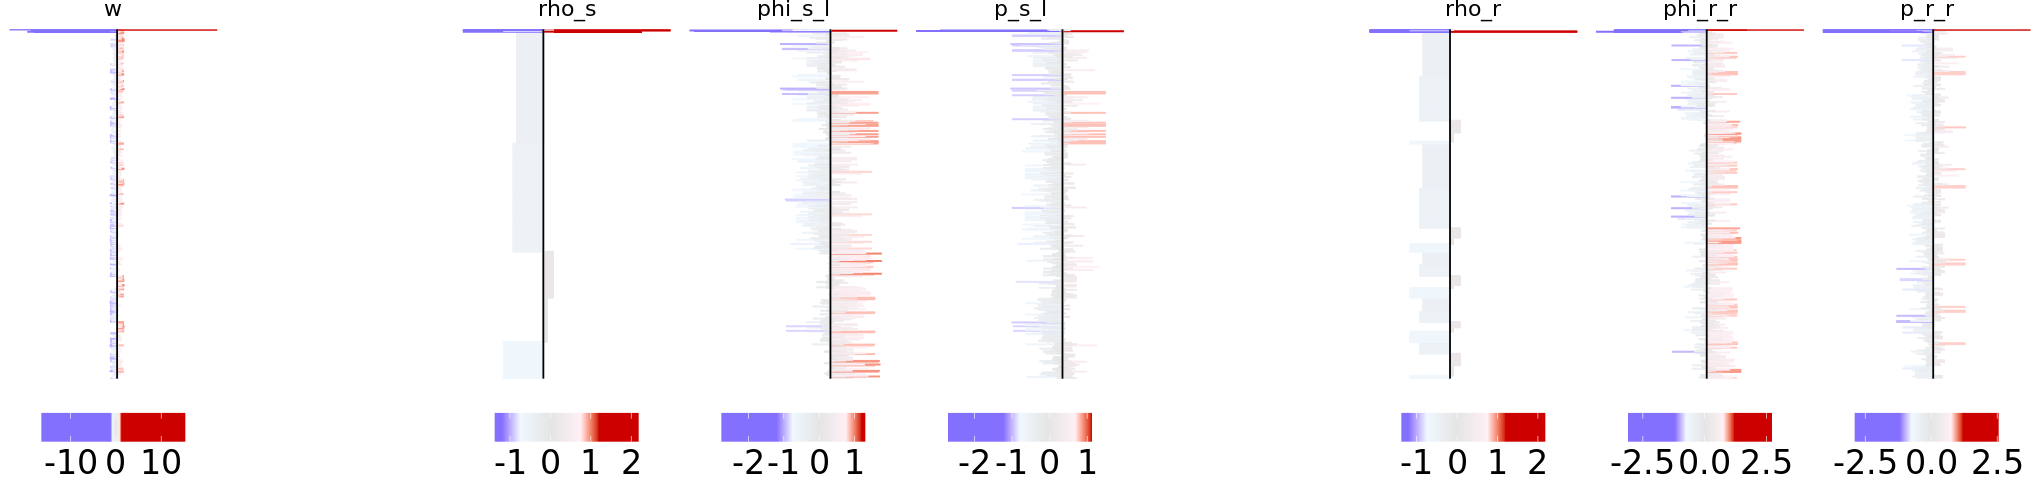

In [29]:
IDs <- as.character(c(ID_order_no_change
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 4)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] B:GNAI2_Gran:FPR1  NK:GNAI2_Gran:FPR1 NK:ARF6_Gran:SMAP1 NK:ANXA1_Gran:FPR1
[5] T:GNAI2_Gran:FPR1  T:ARF6_Gran:SMAP1 
74 Levels: B:GNAI2_Gran:FPR1 < B:SRGN_DC:CD44 < ... < T:SORL1_DC:APP
[1] -13.819096 -13.139346  -3.704074 -13.752115 -13.799028  -2.859613


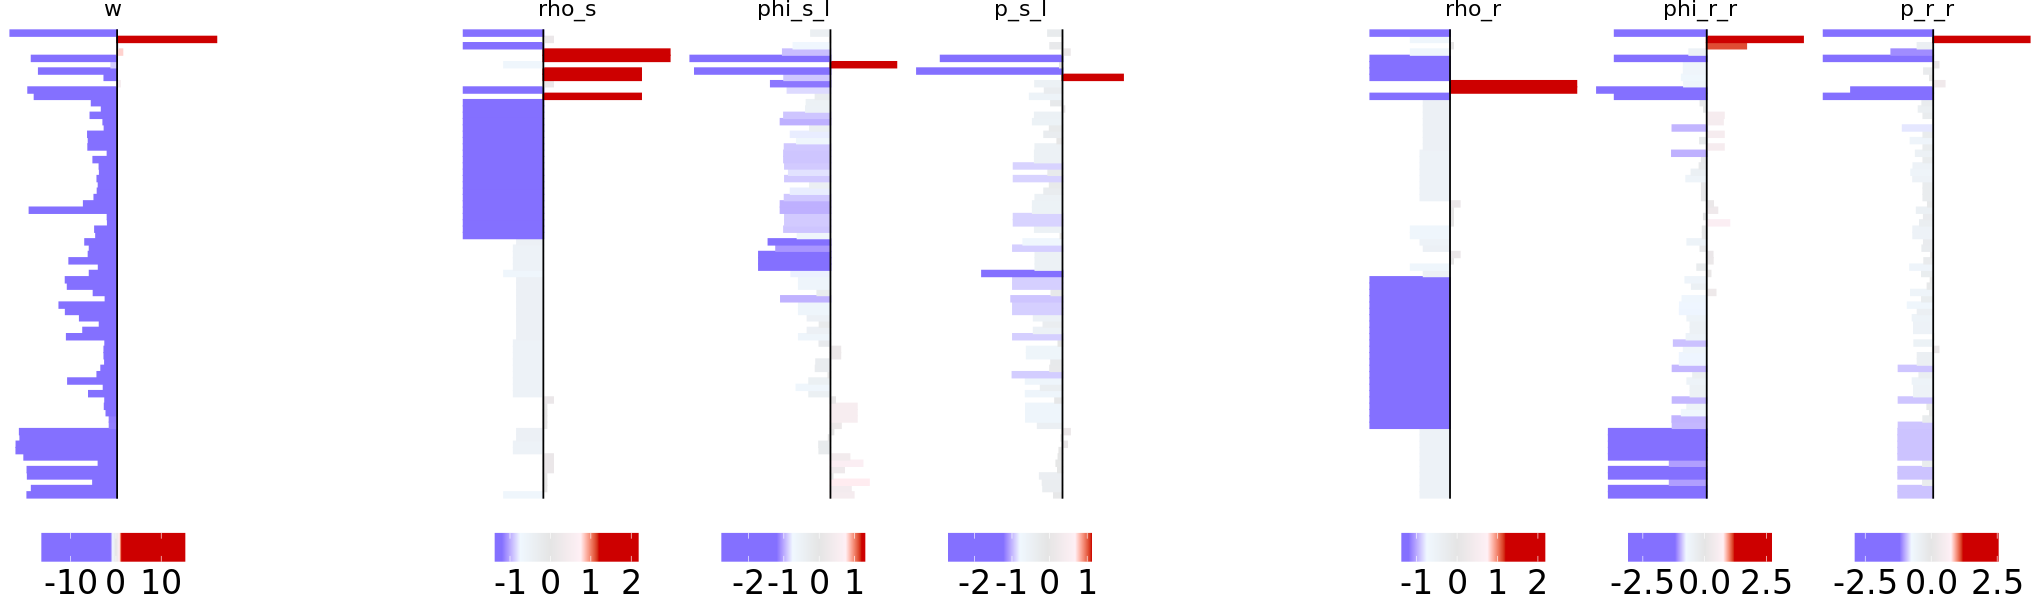

In [30]:
IDs <- as.character(c(ID_order_rho_s_only_down
                         ,ID_order_phi_s_only_down
                         ,ID_order_p_s_only_down
                         ,ID_order_rho_r_only_down
                         ,ID_order_phi_r_only_down
                         ,ID_order_p_r_only_down
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 5#3
       )

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] HSPC:MDK_Gran:NOTCH2 Ery:HSP90AA1_DC:LRP1 DC:CALR_HSPC:ITGA2B 
[4] T:MAML2_HSPC:NOTCH2  Ery:TIMP1_DC:CD63    Ery:SPTBN2_DC:PTPRA 
12 Levels: B:SRGN_DC:CD44 < DC:CALR_HSPC:ITGA2B < ... < T:MAML2_HSPC:NOTCH2
[1]   1.4816364 -12.6988892 -13.6856723   0.4497916  -1.9622992 -12.0469312


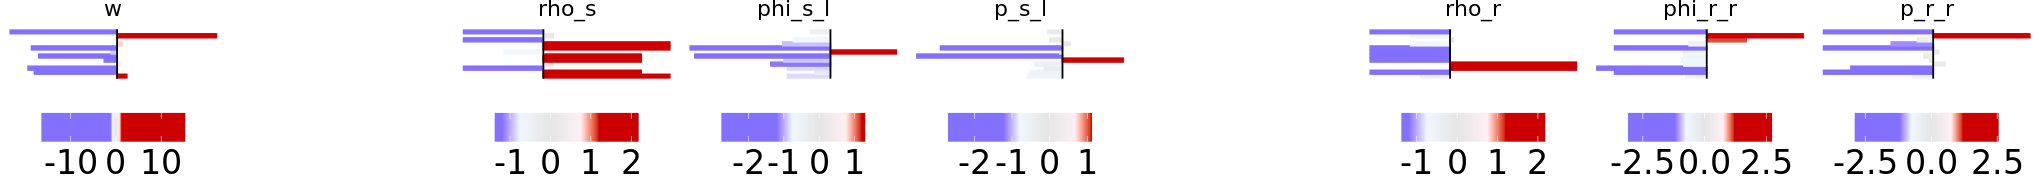

In [31]:
IDs <- as.character(c(ID_order_rho_s_only_up
                          ,ID_order_phi_s_only_up
                          ,ID_order_p_s_only_up
                          ,ID_order_rho_r_only_up
                          ,ID_order_phi_r_only_up
                          ,ID_order_p_r_only_up
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 1.5)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] Gran:LILRB2_DC:CD33  DC:FCGRT_Gran:LILRB2 DC:HLA-F_Gran:LILRB2
[4] DC:FCGRT_DC:LILRB2   DC:HLA-F_DC:LILRB2   DC:FCN1_DC:LRP1     
211 Levels: B:B2M_DC:CD1C < B:B2M_DC:HLA-F < ... < T:PSAP_DC:LRP1
[1]  -1.485782  -2.361918  -2.717032  -2.692094  -2.656670 -16.070369


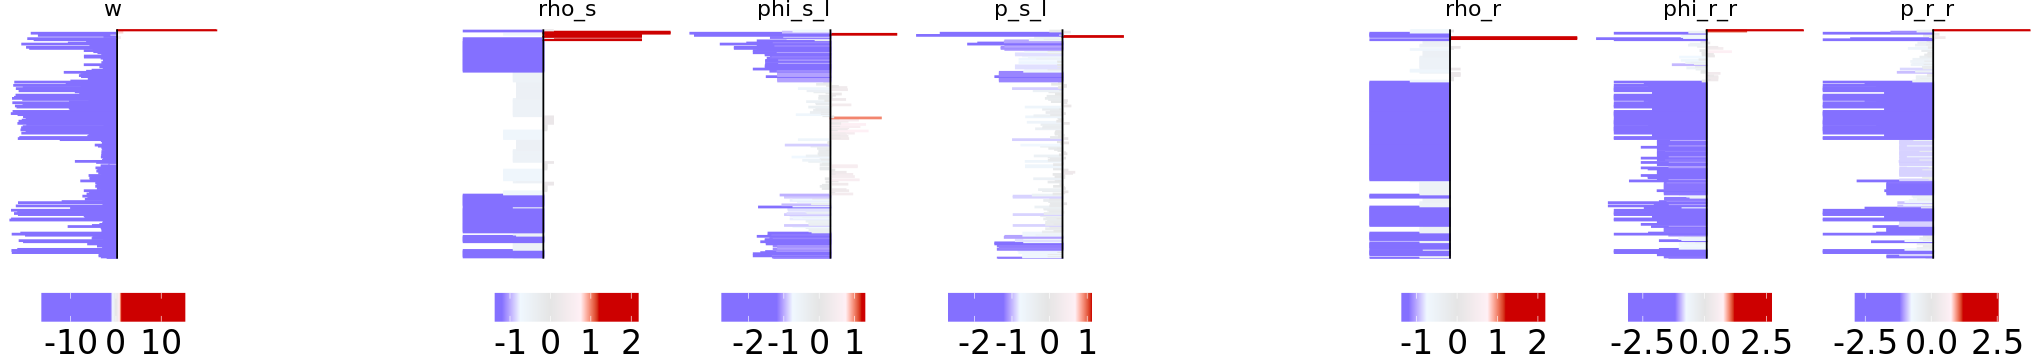

In [32]:
IDs <- as.character(c(ID_order_concordantDown_s
                          ,ID_order_concordantDown_r
                          ,ID_order_concordantDown_b_one_one
                          ,ID_order_concordantDown_b_one_several
                          ,ID_order_concordantDown_b_several_one
                          ,ID_order_concordantDown_b_several_several
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 3)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] HSPC:ARF6_HSPC:PLD1   T:B2M_B:TFRC          B:ARF6_HSPC:PLD1     
[4] Mono:S100A8_HSPC:CD68 Mono:S100A9_HSPC:CD68 Mono:ARF6_HSPC:PLD1  
16 Levels: B:ARF6_HSPC:PLD1 < B:SRGN_DC:CD44 < ... < T:MAML2_HSPC:NOTCH2
[1] 10.023828 15.273847  5.539608  6.473828  6.545726  6.491997


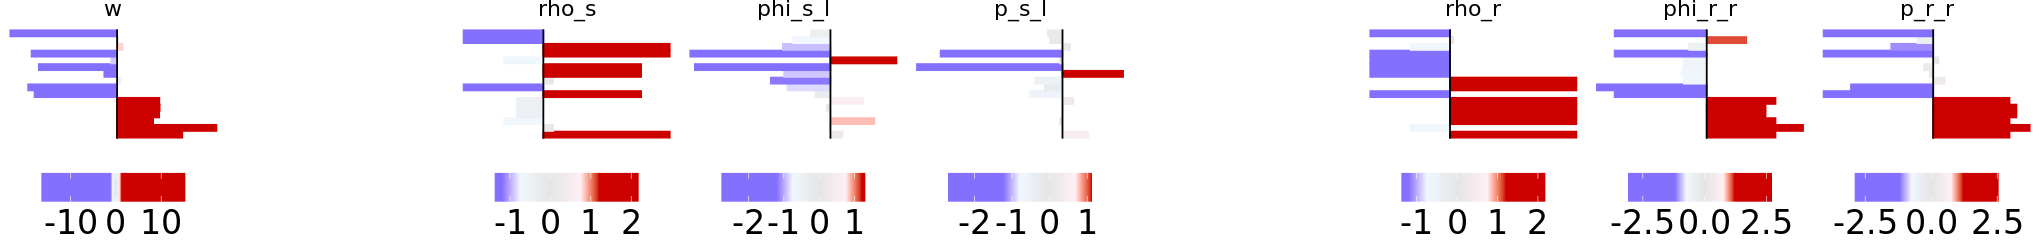

In [33]:
IDs <- as.character(c(ID_order_concordantUp_s
                          ,ID_order_concordantUp_r
                          ,ID_order_concordantUp_b_one_one
                          ,ID_order_concordantUp_b_one_several
                          ,ID_order_concordantUp_b_several_one
                          ,ID_order_concordantUp_b_several_several
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 2)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] Gran:S100A12_Ery:CD36  Gran:CD14_Ery:ITGB1    Gran:RETN_Ery:CAP1    
[4] Gran:S100A12_HSPC:CD36 Gran:CD14_Ery:ITGA4    Gran:CD14_Ery:PLXND1  
414 Levels: B:CALR_HSPC:ITGA2B < B:LRPAP1_HSPC:CD320 < ... < T:MAML2_HSPC:NOTCH2
[1]  -3.404327  -6.123099  -1.551228 -13.610348  -6.059818 -12.495246


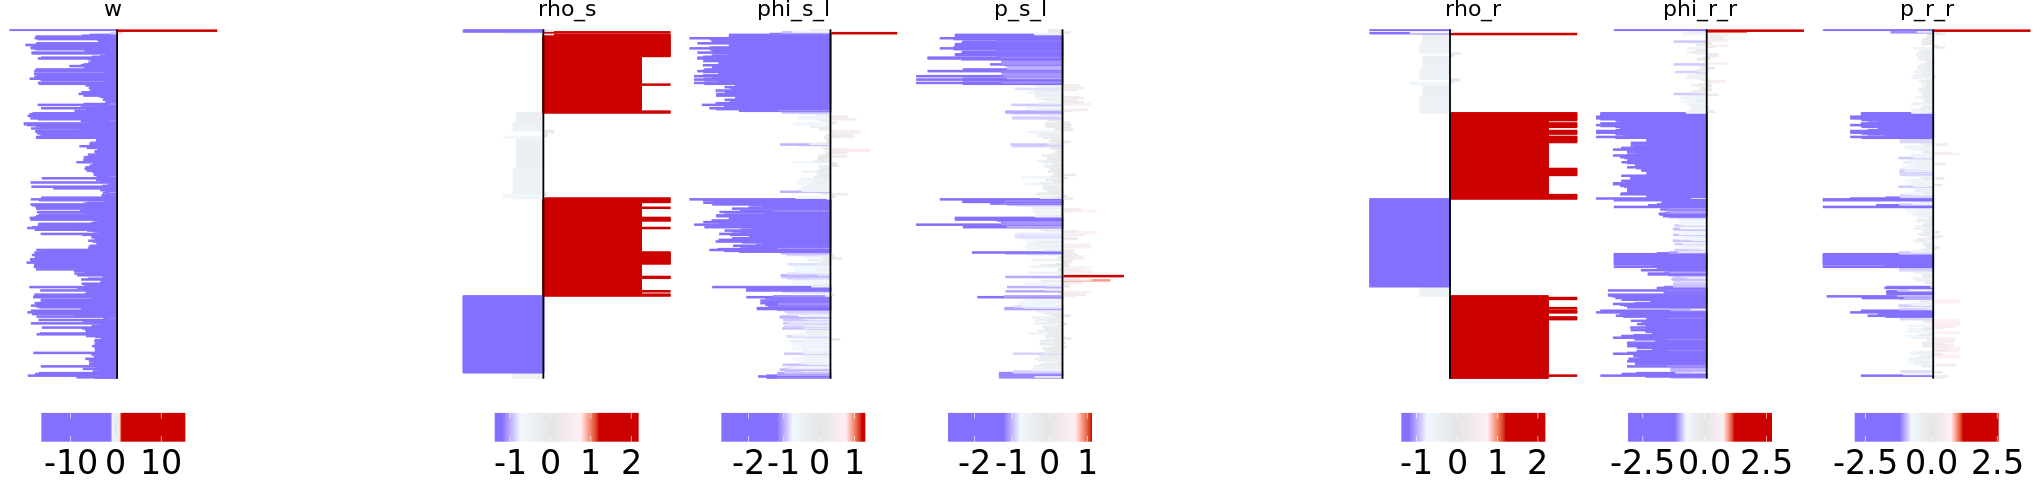

In [34]:
IDs <- as.character(c(ID_order_insuffDown_s
                          ,ID_order_insuffDown_r
                          ,ID_order_insuffDown_b
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 4)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] Gran:ADAM17_Ery:MUC1 Ery:ADAM10_Gran:CD44 Ery:HSP90AA1_DC:LRP1
[4] DC:CALR_HSPC:ITGA2B  T:MAML2_HSPC:NOTCH2  Ery:TIMP1_DC:CD63   
13 Levels: B:SRGN_DC:CD44 < DC:CALR_HSPC:ITGA2B < ... < T:MAML2_HSPC:NOTCH2
[1]   1.1754691   1.0962396 -12.6988892 -13.6856723   0.4497916  -1.9622992


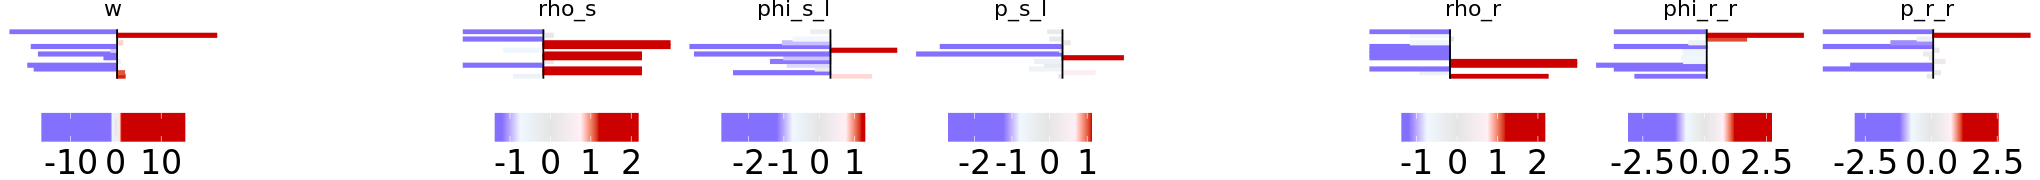

In [35]:
IDs <- as.character(c(ID_order_insuffUp_s
                          ,ID_order_insuffUp_r
                          ,ID_order_insuffUp_b
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 1.5)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

In [36]:
length(ID_order_suffComp_b)

[1] 354

[1] B:TGFB1_Gran:TGFBR2 B:SRGN_DC:CD44      B:TGFB1_DC:SMAD3   
[4] B:TGFB1_DC:LPP      B:CD99_DC:PILRA     B:TGFB1_DC:CXCR4   
732 Levels: B:ACTR2_Ery:LDLR < B:ADAM10_Ery:CD44 < ... < T:UBC_HSPC:SMAD3
[1] -0.9463990 -0.8958374 -0.6502260 -0.9375456 -0.6866383 -0.9327732


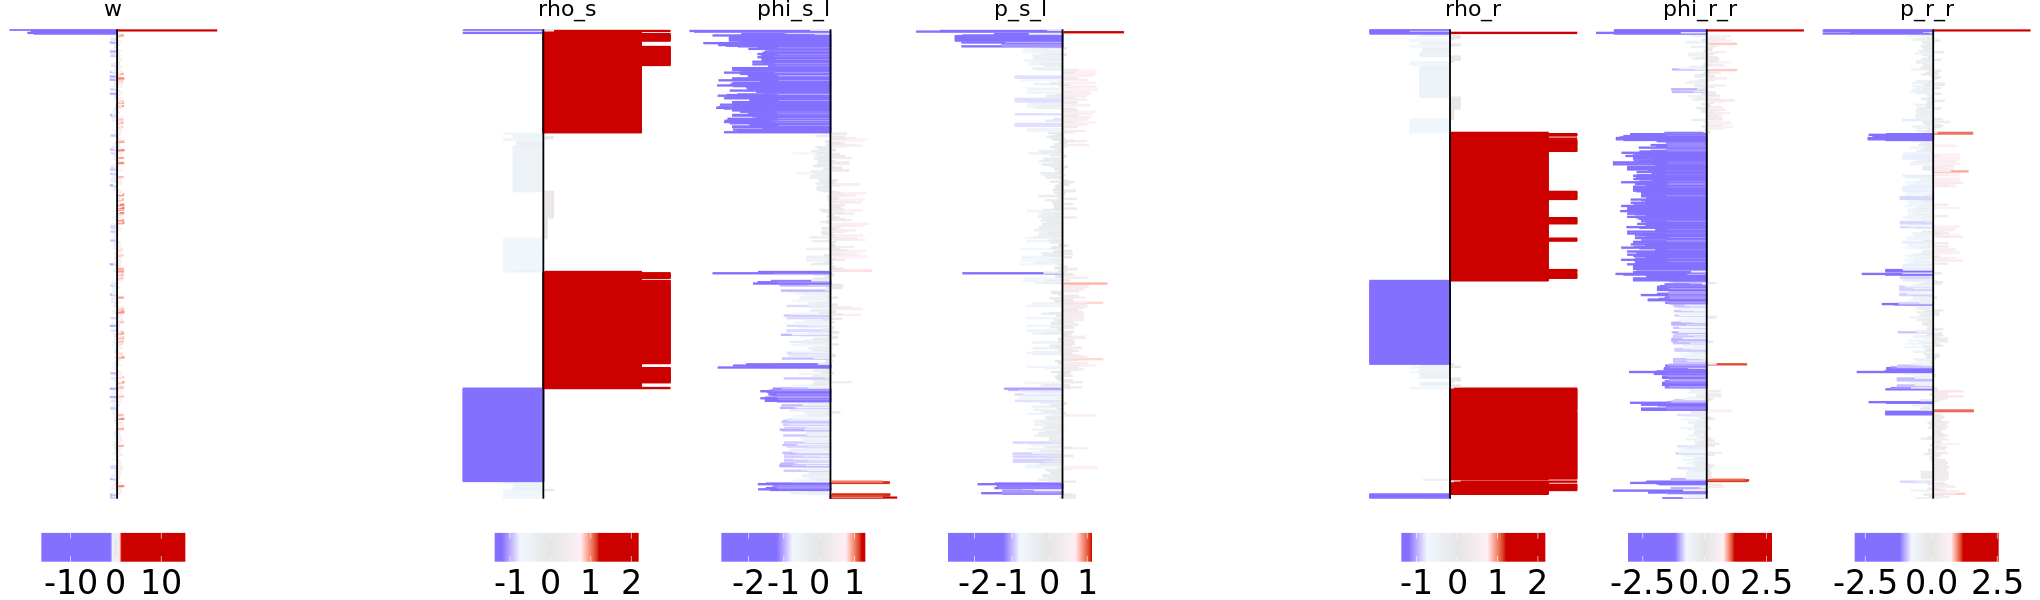

In [37]:
IDs <- as.character(c(ID_order_suffComp_s
                          ,ID_order_suffComp_r
                          ,ID_order_suffComp_b
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 5)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

In [38]:
paste0('For the communication analysis, the threshold_celltype_size and',
  ' the threshold_nr_active_cells were both set to ',interactions$thresholds$threshold_nr_active_cells,
  ' cells, the threshold_expr  was set to ',interactions$thresholds$threshold_expr ,
  ' The total number of interactions were ',nrow(interactions$anno_interactions), 
  '. For the QC, the  threshold_log10_cum_weight, ',
  'the threshold_frac_samples_per_condition, and the threshold_log10meanexpr_per_condition were set to ',
  interactions$thresholds$threshold_log10_cum_weight, ', ',  interactions$thresholds$threshold_frac_samples_per_condition,
  ', ', interactions$thresholds$threshold_log10_meanexpr_per_condition,
  ' respectively. The total number of good quality interactions was ',sum(idx_good),
  '. The differential communication analysis was run on good quality interactions using t-test on log2-',
  'transformed weights and FDR adjustment. The threshold_log2FC was set to ', interactions$thresholds$threshold_log2FC ,
  ' and the threshold_fdr was set to ',interactions$thresholds$threshold_fdr ,
  ', which yielded ',sum(idx_down & idx_sign),' downregulated and ',sum(idx_up & idx_sign) ,' upregulated interactions.')

[1] "For the communication analysis, the threshold_celltype_size and the threshold_nr_active_cells were both set to 6 cells, the threshold_expr  was set to 0.1 The total number of interactions were 151744. For the QC, the  threshold_log10_cum_weight, the threshold_frac_samples_per_condition, and the threshold_log10meanexpr_per_condition were set to 0.01, 0.6, 0.02 respectively. The total number of good quality interactions was 9200. The differential communication analysis was run on good quality interactions using t-test on log2-transformed weights and FDR adjustment. The threshold_log2FC was set to 1 and the threshold_fdr was set to 0.1, which yielded 726 downregulated and 9 upregulated interactions."

In [39]:
# index of significant interactions in community
idx_sign_lasry <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign
sum(idx_sign_lasry)

[1] 735

In [40]:
# ligands and receptors in the immune interactions: down in Lasry
idx_down_Lasry_immune <- idx_sign & (
    interactions$anno_interactions$log2FC_weights < 0) & (
    !(grepl("Ery",interactions$anno_interactions$interaction_ID)
     ) & !(grepl("HSPC", interactions$anno_interactions$interaction_ID))
)
ligrec_down_Lasry_immune <- unique(c(interactions$anno_interactions$ligand_gene_name[idx_down_Lasry_immune]
                                               ,interactions$anno_interactions$receptor_gene_name[idx_down_Lasry_immune]
                                              )
                                            )


write.csv(ligrec_down_Lasry_immune
         ,file = paste0(path_in, "ligrec_downImmune.csv")
         ,row.names=FALSE
         ,quote=FALSE)

In [41]:
# ligands and receptors: good quality in Lasry (background set)
idx_good <- interactions$anno_interactions$passed_QC_filter
ligrec_goodQuality_Lasry <- unique(c(interactions$anno_interactions$ligand_gene_name[idx_good]
                                               ,interactions$anno_interactions$receptor_gene_name[idx_good]
                                              )
                                            )
print(str(ligrec_goodQuality_Lasry))
write.csv(ligrec_goodQuality_Lasry
         ,file = paste0(path_in, "ligrec_goodQuality_Lasry.csv")
         ,row.names=FALSE
         ,quote=FALSE)

 chr [1:426] "TYK2" "CCL3" "SERPINA1" "ANXA1" "S100A8" "S100A9" "GRN" ...
NULL


In [42]:
ligrec_random <- ligrec_goodQuality_Lasry[sample.int(660, 387)]
print(length(unique(ligrec_random)))

write.csv(ligrec_random
         ,file = paste0(path_in, "ligrec_random_Lasry.csv")
         ,row.names=FALSE
         ,quote=FALSE)

[1] 236


In [43]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /work/project/ladcol_011/conda_path/miniconda3/envs/community_paper/lib/libopenblasp-r0.3.26.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] gridExtra_2.3         igraph_1.6.0          circlize_0.4.15      
[4] ComplexHeatmap_2.10.0 ggrepel_0.9.5         ggplot2_3.4.4        
[7] community_1.4.1      

loaded via a namespace (and not attached):
  [1] readxl_1.4.3                uuid_1.1-0 